**Shifted Griewank Function**

Environment : Python 3.8.2 & Jupyter Notebook<br>

The objective is to solve unconstrained problem : F5 as described in the “CEC2008_TechnicalReport.pdf” for both dimensions D = 50 and D = 500. <br>
F5: Shifted Griewank<br>

The coordinates of the shifted global minimum of this function in dim = 1000 are provided in a numpy array in a data file "data.py". These are the target coordinates to be achieved.<br>
F5: griewankdat -> shape = (1000,) <br>

The fitness or value of this function at its minimum is also available in numpy array "f_bias" in "data.py". This is the the target fitness value to achieve.<br>
f_bias[4] = F5_min = -180
<img src="Functions.png">

Import Libraries

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from psopy import minimize as minimize_pso

**Import Data**

In [2]:
# Import data in data.py file and print shape of input arrays
from data import *
print(griewankdat.shape)
print(f_bias[4])

(1000,)
-180.0


- Algorithm : Particle Swarm Optimization - The shifted Griewank function is multimodal and as such requires a heuristic-based algorithm. PSO is chosen for it's low computational cost. 
- Library : psopy
- Parameters of the algorithm : Number of particles, stable_iter(Number of iterations to wait before Swarm is declared stable) 
- Stopping criterion : stable_iter = 100
- Number of function evaluations : see below
- Computational time : see below
- Convergence curve : see below
- Final results (solution and fitness) : see below

In [3]:
# Define objective function to minimize
def Shifted_Griewank(x):
    z = np.subtract(x[:dim], griewankdat[:dim])
    return f_bias[4] + np.sum(np.divide(np.power(z, 2), 4000)) \
                     - np.prod(np.cos(z/np.sqrt(np.arange(1,dim+1)))) + 1


def Minimize_PSO(func, targetmin=None, nb_particles=None, stable_iter=None, self_confid=None, swarm_confid=None, 
                 bounds_min = None, bounds_max = None):
    """ Minimize func using Particle Swarm Optimization with a given particle self confidence and swarm condifence
        Stopping condition : Maximum change in best fitness smaller than default tol=1e-6 for stable_iter iterations"""
    
    print("Number of dimensions : {}".format(dim))
    
    since = time.time()
    
    # Generate nb_particles particles of dimension dim, with coordinates between min and max
    x0 = np.random.uniform(bounds_min, bounds_max, (nb_particles, dim))
    
    # Run Particle Swarm Optimization
    res = minimize_pso(func, x0, options={'stable_iter': stable_iter, 'l_rate':self_confid, 'g_rate':swarm_confid, 
                       'verbose' : False, 'savefile': "output.csv"})
    
    # Show results
    print("Computational time : {:.2f} s".format(time.time()-since))
    print("Fitness at minimum (result): {:.4f} ".format(res.fun))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))
    print("Function evaluations : {}".format(res.nit*nb_particles))

    converg = pd.read_csv("output.csv", sep=",")
    plt.plot(converg.Iter+1, converg.Func, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()
    
    print("x_minimum :\n{}".format(res.x))

D = 50

Number of dimensions : 50
Computational time : 1.51 s
Fitness at minimum (result): -179.2438 
Fitness at minimum (real): -180.0000 
Function evaluations : 19980


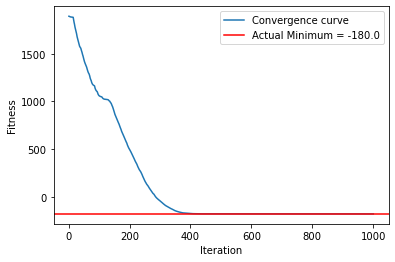

x_minimum :
[ 540.32396617 -322.53011024  128.72251185  -17.03278398  470.69589352
  314.61399407  -51.53202792 -577.9209445   384.79716452  -67.91961654
  137.99473443  350.43710227  506.64971264  285.55264892 -389.72942129
 -112.35597604  521.65287047  502.25224975 -105.86640597  472.8768074
 -530.55647098 -175.85676152  376.33287158 -587.55580418 -434.26837305
 -356.73596568 -361.77056769  124.9741389  -272.74049159 -362.16372898
 -582.46061679  294.7929818   -66.21541193  519.47012297  -41.15856257
  -99.77787193  418.29444598   30.36650051 -357.08497475  204.041979
  405.68071947 -577.58483714  220.3369813  -143.50603919  397.58384934
    2.87405201  249.22079569  -85.19896735 -236.2867276  -372.09413378]


In [4]:
dim = 50
Minimize_PSO(Shifted_Griewank, targetmin=f_bias[4], nb_particles=20, stable_iter=100, self_confid=0.5, swarm_confid=10
             ,bounds_min=-600, bounds_max=600)

D = 500

Number of dimensions : 500
Computational time : 48.70 s
Fitness at minimum (result): -162.5354 
Fitness at minimum (real): -180.0000 
Function evaluations : 299700


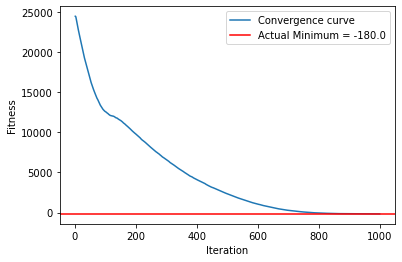

x_minimum :
[ 557.47191699 -330.65115428  126.57088299  -12.81456855  479.07868284
  327.55457734  -31.95569887 -572.72347854  392.968892    -81.69068605
  119.68437558  335.07230843  498.68813822  298.9168327  -387.77991251
 -111.16285861  519.42446543  503.10544834 -110.16364617  488.65674083
 -536.96531514 -188.00758802  370.2313883  -585.36720087 -446.14268243
 -338.18664493 -364.99416017  102.79338509 -295.73539431 -354.32880326
 -582.37972958  289.29910131  -44.58723983  518.1136035   -41.55887905
 -116.69497169  432.89925192   37.35486255 -364.25640449  196.03602277
  395.85724891 -566.97720098  207.85486148 -126.52290908  402.54853741
    1.46150966  259.0646934   -83.13953221 -228.00532548 -372.19599622
 -360.5098223   213.67714076 -221.51202867   47.37589816 -423.70359361
  232.22178735 -141.79490849  444.20081175  429.16529172   97.9303054
   20.38656928  471.58634455  377.59090953  177.95086523  398.69192817
  173.11123911 -211.26117008 -248.35545062 -202.35226415   54.6986

In [5]:
dim = 500
Minimize_PSO(Shifted_Griewank, targetmin=f_bias[4], nb_particles=300, stable_iter=100, self_confid=0.5, swarm_confid=20
            ,bounds_min=-600, bounds_max=600)

PSO gives accceptable results on Griewank multimodal function minimization problem with a reasonable computational cost for both D=50 and D=500.